In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.1


# Sequence modelling 

## Coding tutorials
 #### [1.  The IMDb dataset](#coding_tutorial_1)
 #### [2. Padding and masking sequence data](#coding_tutorial_2)
 #### [3. The Embedding layer](#coding_tutorial_3)
 #### [4. The Embedding Projector](#coding_tutorial_4)
 #### [5. Recurrent neural network layers](#coding_tutorial_5)
 #### [6. Stacked RNNs and the Bidirectional wrapper](#coding_tutorial_6)

***
<a id="coding_tutorial_1"></a>
## The IMDb Dataset

#### Load the IMDB review sentiment dataset

In [7]:
# Import imdb
import tensorflow.keras.datasets.imdb as imdb


In [9]:
# Download and assign the data set using load_data()
(x_train, y_train), (x_test, y_test) = imdb.load_data()


17465344/17464789 [==============================] - 1s 0us/step


#### Inspect the dataset

In [10]:
# Inspect the type of the data

type(x_train)

numpy.ndarray

In [11]:
# Inspect the shape of the data
x_train.shape


(25000,)

In [12]:
# Display the first dataset element input
# Notice encoding

x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [13]:
# Display the first dataset element output

y_train[0]

1

#### Load dataset with different options

In [ ]:
# Load the dataset with defaults
imbd.load_data(path='imdb.npz', index_from=3)

# ~/.keras/dataset/

In [ ]:
# Limit the vocabulary to the top 500 words using num_words

imbda.load_data(num_words=1000)

In [ ]:
# Ignore the top 10 most frequent words using skip_top
imdb.load_data(skip_top=10, num_words=1000, oov_char=2)


In [ ]:
# Limit the sequence lengths to 500 using maxlen
imdb.load_data(max_length=500)


In [ ]:
# Use '1' as the character that indicates the start of a sequence
imdb.load_data(start_char=1)


#### Explore the dataset word index

In [17]:
# Load the imdb word index using get_word_index()
imdb_word_index = imdb.get_word_index()


In [21]:
# View the word index as a dictionary,
# accounting for index_from.

index_from = 3 
imdb_word_index = {key: value + index_from for key, value in imdb_word_index.items()}

In [23]:
# Retrieve a specific word's index

imdb_word_index['simpsonian']

52256

In [25]:
# View an input sentence

imdb_word_index['the']

4

In [28]:
# Get the sentiment value

inv_imdb_word_index = {value: key for key, value in imdb_word_index.items()}
[inv_imdb_word_index[index] for index in x_train[0] if index > index_from]

['this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 "redford's",
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 "norman's",
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 'retail',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'at',
 'the',


---
<a id="coding_tutorial_2"></a>
## Padding and Masking Sequence Data

In [29]:
# Load the imdb data set

(x_train, y_train), (x_test, y_test) = imdb.load_data()

#### Preprocess the data with padding

In [30]:
# Inspect the input data shape

x_train.shape

(25000,)

In [31]:
# Pad the inputs to the maximum length using maxlen
padded_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, 
                                                               maxlen=300,
                                                              padding='post',
                                                              truncating='post')


In [32]:
# Inspect the output data shape
padded_x_train.shape


(25000, 300)

#### Create a Masking layer

In [33]:
# Import numpy 
import numpy as np


In [35]:
# Masking expects to see (batch, sequence, features)
# Create a dummy feature dimension using expand_dims
padding_x_train = np.expand_dims(padded_x_train, -1)


In [36]:
# Create a Masking layer 

tf_x_train = tf.convert_to_tensor(padded_x_train, dtype='float32')
masking_layer = tf.keras.layers.Masking(mask_value=0.0)

In [37]:
# Pass tf_x_train to it
masked_x_train = masking_layer(tf_x_train)


In [41]:
# Look at the dataset

masked_x_train

<tf.Tensor: shape=(25000, 300), dtype=float32, numpy=
array([[1.000e+00, 1.400e+01, 2.200e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.940e+02, 1.153e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.400e+01, 4.700e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.000e+00, 1.100e+01, 6.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.446e+03, 7.079e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.700e+01, 6.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]], dtype=float32)>

In [42]:
# Look at the ._keras_mask for the dataset

masked_x_train._keras_mask

<tf.Tensor: shape=(25000,), dtype=bool, numpy=array([ True,  True,  True, ...,  True,  True,  True])>

***
<a id="coding_tutorial_3"></a>
## The Embedding layer

#### Create and apply an `Embedding` layer

In [43]:
# Create an embedding layer using layers.Embedding
# Specify input_dim, output_dim, input_length
embedding_layer = tf.keras.layers.Embedding(input_dim=501, 
                                            output_dim=16)


In [45]:
# Inspect an Embedding layer output for a fixed input
# Expects an input of shape (batch, sequence, feature)

sequence_of_indices = tf.constant([[0], [1], [5], [500]])
sequence_of_embending = embedding_layer(sequence_of_indices)
sequence_of_embending

<tf.Tensor: shape=(4, 1, 16), dtype=float32, numpy=
array([[[-0.03242822, -0.02802607,  0.01145048,  0.02904891,
          0.01931391, -0.01124861, -0.00372808,  0.02615016,
         -0.04000211,  0.01364528,  0.04943602, -0.01078586,
          0.04089976, -0.03329247, -0.02313279,  0.01238835]],

       [[-0.01160675, -0.02529991,  0.02924968,  0.03588872,
          0.02552934, -0.00669545, -0.04304881, -0.0127495 ,
         -0.04147704, -0.01291341,  0.04878333,  0.02173368,
         -0.04162099, -0.03040825,  0.04479137, -0.03064022]],

       [[-0.01764139, -0.00857397, -0.00972961, -0.04558181,
          0.02352976,  0.01114865, -0.04396062, -0.04077604,
         -0.01951181, -0.03926812, -0.00830984, -0.01538996,
         -0.02534169, -0.03126987,  0.03798768, -0.04666258]],

       [[-0.04467777, -0.00722337, -0.04593992, -0.01817216,
         -0.0018855 ,  0.03529641, -0.00173163, -0.04290871,
          0.0122407 , -0.0343926 , -0.00456049, -0.02811949,
          0.03526152,  0

In [47]:
# Inspect the Embedding layer weights using get_weights()

embedding_layer.get_weights()[0]

array([[-0.03242822, -0.02802607,  0.01145048, ..., -0.03329247,
        -0.02313279,  0.01238835],
       [-0.01160675, -0.02529991,  0.02924968, ..., -0.03040825,
         0.04479137, -0.03064022],
       [-0.03014647, -0.01707707, -0.00446541, ..., -0.01037161,
         0.04504392, -0.04568123],
       ...,
       [-0.03391897,  0.01957675,  0.00502329, ...,  0.04106058,
         0.03303326,  0.00916768],
       [ 0.00706673,  0.04658676,  0.00633251, ...,  0.01155012,
         0.02954607, -0.0248315 ],
       [-0.04467777, -0.00722337, -0.04593992, ...,  0.03280627,
        -0.03721434, -0.00841609]], dtype=float32)

In [48]:
# Get the embedding for the 14th index
embedding_layer.get_weights()[0][14, :]


array([-0.02911545, -0.02105931, -0.034539  ,  0.00925876, -0.01245273,
        0.01604697, -0.01245903,  0.0013809 ,  0.01389054, -0.01195872,
        0.01570788,  0.04806406, -0.01804153,  0.00091764, -0.04785541,
        0.01978251], dtype=float32)

#### Create and apply an `Embedding` layer that uses `mask_zero=True`

In [49]:
# Create a layer that uses the mask_zero kwarg

masking_embedded_layer = tf.keras.layers.Embedding(input_dim=501, 
                                                   output_dim=16,
                                                   mask_zero=True)

In [52]:
# Apply this layer to the sequence and see the _keras_mask property
masked_sequence_of_embeddings = masking_embedded_layer(sequence_of_indices)
masked_sequence_of_embeddings._keras_mask

<tf.Tensor: shape=(4, 1), dtype=bool, numpy=
array([[False],
       [ True],
       [ True],
       [ True]])>

---
<a id="coding_tutorial_4"></a>
## The Embedding Projector

#### Load and preprocess the IMDb data

In [1]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [4]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset()

In [5]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [6]:
# Get the word index

imdb_word_index = get_imdb_word_index()

In [12]:
# Swap the keys and values of the word index
inv_imdb_word_index = {value: key for key, value in imdb_word_index.items()}


In [13]:
# View the first dataset example sentence

[inv_imdb_word_index[index] for index in x_train[100] if index >  2]

['i',
 'am',
 'a',
 'great',
 'fan',
 'of',
 'david',
 'lynch',
 'and',
 'have',
 'everything',
 'that',
 "he's",
 'made',
 'on',
 'dvd',
 'except',
 'for',
 'hotel',
 'room',
 'the',
 '2',
 'hour',
 'twin',
 'peaks',
 'movie',
 'so',
 'when',
 'i',
 'found',
 'out',
 'about',
 'this',
 'i',
 'immediately',
 'grabbed',
 'it',
 'and',
 'and',
 'what',
 'is',
 'this',
 "it's",
 'a',
 'bunch',
 'of',
 'drawn',
 'black',
 'and',
 'white',
 'cartoons',
 'that',
 'are',
 'loud',
 'and',
 'foul',
 'mouthed',
 'and',
 'unfunny',
 'maybe',
 'i',
 "don't",
 'know',
 "what's",
 'good',
 'but',
 'maybe',
 'this',
 'is',
 'just',
 'a',
 'bunch',
 'of',
 'crap',
 'that',
 'was',
 'on',
 'the',
 'public',
 'under',
 'the',
 'name',
 'of',
 'david',
 'lynch',
 'to',
 'make',
 'a',
 'few',
 'bucks',
 'too',
 'let',
 'me',
 'make',
 'it',
 'clear',
 'that',
 'i',
 "didn't",
 'care',
 'about',
 'the',
 'foul',
 'language',
 'part',
 'but',
 'had',
 'to',
 'keep',
 'the',
 'sound',
 'because',
 'my',
 'ne

#### Build an Embedding layer into a model

In [14]:
# Get the maximum token value
max_index_value = max(imdb_word_index.values())


In [15]:
# Specify an embedding dimension

embedding_dim = 16

In [16]:
# Build a model using Sequential:
#     1. Embedding layer
#     2. GlobalAveragePooling1D
#     3. Dense

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=False),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [19]:
# Functional API refresher: use the Model to build the same model
review_sequence = tf.keras.Input((None, ))
embedding_sequence = tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim)(review_sequence)
average_embedding = tf.keras.layers.GlobalAveragePooling1D()(embedding_sequence)
positve_probability = tf.keras.layers.Dense(units=1, activation='sigmoid')(average_embedding)

model = tf.keras.Model(inputs=review_sequence, outputs=positve_probability)

In [20]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, None, 16)          160016    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


#### Compile, train, and evaluate the model

In [21]:
# Compile the model with a binary cross-entropy loss

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [22]:
# Train the model using .fit(), savng its history
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), validation_steps=20)


Epoch 1/5
782/782 [==============================] - 4s 5ms/step - loss: 0.6903 - accuracy: 0.5664 - val_loss: 0.6849 - val_accuracy: 0.5469
Epoch 2/5
782/782 [==============================] - 5s 6ms/step - loss: 0.6703 - accuracy: 0.6865 - val_loss: 0.6484 - val_accuracy: 0.6781
Epoch 3/5
782/782 [==============================] - 6s 8ms/step - loss: 0.6257 - accuracy: 0.7601 - val_loss: 0.6031 - val_accuracy: 0.7406
Epoch 4/5
782/782 [==============================] - 7s 9ms/step - loss: 0.5738 - accuracy: 0.7942 - val_loss: 0.5519 - val_accuracy: 0.7828
Epoch 5/5
782/782 [==============================] - 8s 10ms/step - loss: 0.5254 - accuracy: 0.8176 - val_loss: 0.5085 - val_accuracy: 0.8000


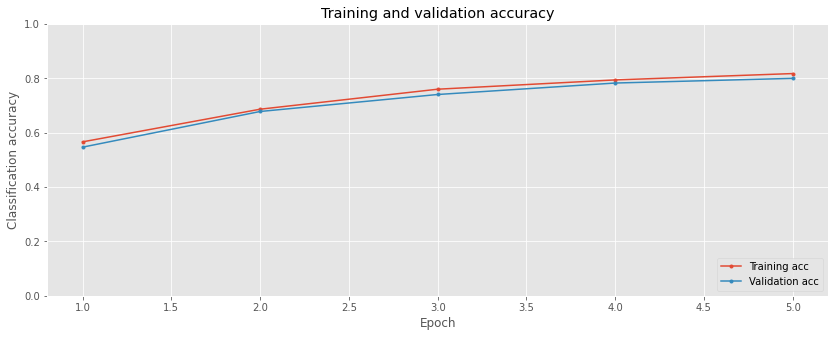

In [23]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### The TensorFlow embedding projector

The Tensorflow embedding projector can be found [here](https://projector.tensorflow.org/).

In [25]:
# Retrieve the embedding layer's weights from the trained model

weights = model.layers[1].get_weights()[0]

In [26]:
# Save the word Embeddings to tsv files
# Two files: 
#     one contains the embedding labels (meta.tsv),
#     one contains the embeddings (vecs.tsv)

import io
from os import path

out_v = io.open(path.join('data', 'vecs.tsv'), 'w', encoding='utf-8')
out_m = io.open(path.join('data', 'meta.tsv'), 'w', encoding='utf-8')

k = 0

for word, token in word_index.items():
    if k != 0:
        out_m.write('\n')
        out_v.write('\n')
    
    out_v.write('\t'.join([str(x) for x in weights[token]]))
    out_m.write(word)
    k += 1
    
out_v.close()
out_m.close()
# beware large collections of embeddings!

FileNotFoundError: [Errno 2] No such file or directory: 'data/vecs.tsv'

---
<a id="coding_tutorial_5"></a>
## Recurrent neural network layers

#### Initialize and pass an input to a SimpleRNN layer

In [28]:
# Create a SimpleRNN layer and test it

#(batch, sequence, features)

simplernn_layer = tf.keras.layers.SimpleRNN(units=16)


In [31]:
# Note that only the final cell output is returned

sequence = tf.constant([[[1., 1.], [2. , 2.], [56., -100.]]])
layer_output = simplernn_layer(sequence)
layer_output

<tf.Tensor: shape=(1, 16), dtype=float32, numpy=
array([[ 0.99999887,  1.        , -1.        ,  1.        , -1.        ,
         1.        , -1.        , -1.        , -1.        ,  1.        ,
        -1.        ,  1.        , -1.        ,  1.        ,  0.99015075,
        -1.        ]], dtype=float32)>

#### Load and transform the IMDB review sentiment dataset

In [32]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [33]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(maxlen=250)


In [34]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [35]:
# Get the word index using get_imdb_word_index()

imdb_word_index = get_imdb_word_index()

#### Create a recurrent neural network model

In [36]:
# Get the maximum index value
max_index_value = max(imdb_word_index.values())
embedding_dim = 16

In [38]:
# Using Sequential, build the model:
# 1. Embedding.
# 2. LSTM.
# 3. Dense.

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=False),
    tf.keras.layers.LSTM(units=16),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

#### Compile and fit the model

In [39]:
# Compile the model with binary cross-entropy loss

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')


In [40]:
# Fit the model and save its training history

history = model.fit(x_train, y_train, epochs=3, batch_size=32)

Epoch 1/3
536/536 [==============================] - 30s 57ms/step - loss: 0.4613 - accuracy: 0.7786
Epoch 2/3
536/536 [==============================] - 25s 47ms/step - loss: 0.2456 - accuracy: 0.9065
Epoch 3/3
536/536 [==============================] - 23s 43ms/step - loss: 0.1749 - accuracy: 0.9386


#### Plot learning curves

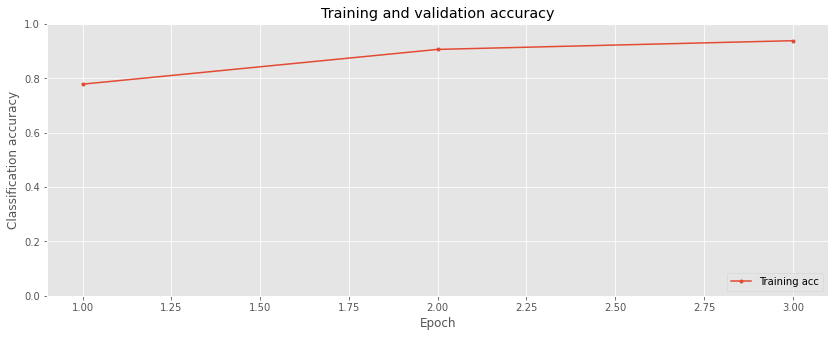

In [43]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
#val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
#val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
#plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### Make predictions with the model

In [45]:
# View the first test data example sentence
# (invert the word index)

inv_imdb_word_index = {value: key for key, value in imdb_word_index.items()}
[inv_imdb_word_index[index] for index in x_test[0] if index > 2]

['please',
 'give',
 'this',
 'one',
 'a',
 'miss',
 'br',
 'br',
 'and',
 'the',
 'rest',
 'of',
 'the',
 'cast',
 'rendered',
 'terrible',
 'performances',
 'the',
 'show',
 'is',
 'flat',
 'flat',
 'flat',
 'br',
 'br',
 'i',
 "don't",
 'know',
 'how',
 'michael',
 'madison',
 'could',
 'have',
 'allowed',
 'this',
 'one',
 'on',
 'his',
 'plate',
 'he',
 'almost',
 'seemed',
 'to',
 'know',
 'this',
 "wasn't",
 'going',
 'to',
 'work',
 'out',
 'and',
 'his',
 'performance',
 'was',
 'quite',
 'so',
 'all',
 'you',
 'madison',
 'fans',
 'give',
 'this',
 'a',
 'miss']

In [46]:
# Get the model prediction using model.predict()

model.predict(x_test[None, 0, :])

array([[0.04489651]], dtype=float32)

In [47]:
# Get the corresponding label
y_test[0]


0

---
<a id="coding_tutorial_6"></a>
## Stacked RNNs and the Bidirectional wrapper

#### Load and transform the IMDB review sentiment dataset

In [2]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [5]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(num_words=5000, maxlen=250)


In [6]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [7]:
# Get the word index using get_imdb_word_index()
imdb_word_index = get_imdb_word_index(num_words=5000)


#### Build stacked and bidirectional recurrent models

In [9]:
# Get the maximum index value and specify an embedding dimension
max_index_value = max(imdb_word_index.values())
embedding_dim = 16

In [10]:
# Using Sequential, build a stacked LSTM model via return_sequences=True
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
    tf.keras.layers.LSTM(units=32, return_sequences=True),
    tf.keras.layers.LSTM(units=32, return_sequences=False),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])


In [13]:
# Using Sequential, build a bidirectional RNN with merge_mode='sum'

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
    tf.keras.layers.Bidirectional(layer=tf.keras.layers.LSTM(units=8), merge_mode='sum',
                                 backward_layer=tf.keras.layers.GRU(units=8, go_backwards=True)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [14]:
# Create a model featuring both stacked recurrent layers and a bidirectional layer

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
    tf.keras.layers.Bidirectional(layer=tf.keras.layers.LSTM(units=8, return_sequences=True), merge_mode='concat'),
    tf.keras.layers.GRU(units=8, return_sequences=False),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

#### Compile and fit the model

In [15]:
# Compile the model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')


In [16]:
# Train the model, saving its history
history = model.fit(x_train, y_train, epochs=3, batch_size=32)


Epoch 1/3
536/536 [==============================] - 107s 200ms/step - loss: 0.4217 - accuracy: 0.7932
Epoch 2/3
536/536 [==============================] - 103s 192ms/step - loss: 0.2428 - accuracy: 0.9078
Epoch 3/3
536/536 [==============================] - 100s 187ms/step - loss: 0.1986 - accuracy: 0.9273


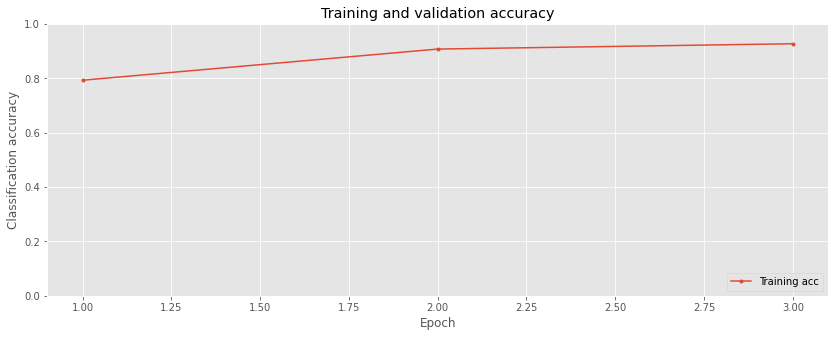

In [18]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
#val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
#val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
#plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);